In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)
import seaborn           as sns
from bmb.v2.source.FilmDB import FilmDB
db = FilmDB()

# Pie Chart: B-Movie Genres

In [2]:
watched = {
    'all'           : db.filmset( tag='watched'),
    'SciFi/ Horror' : db.filmset( genre=('Science Fiction', 'Horror')  , tag='watched'),
    'SciFi'         : db.filmset( genre=('Science Fiction', {'Horror'}), tag='watched'),
    'Horror'        : db.filmset( genre=({'Science Fiction'}, 'Horror'), tag='watched'),
    'other'         : db.filmset( genre={'Science Fiction', 'Horror'}  , tag='watched')
}
print( "Watched Films")
print( "\n".join(map(lambda i:f"{i[0]:15}:\t{len(i[1]):3} films", watched.items())))

Watched Films
all            :	460 films
SciFi/ Horror  :	 33 films
SciFi          :	113 films
Horror         :	 44 films
other          :	270 films


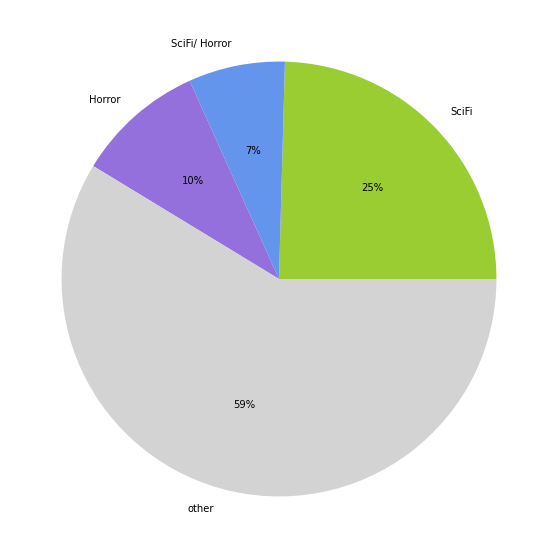

In [3]:
labels = [
    'SciFi',
    'SciFi/ Horror',
    'Horror',
    'other' ]

film_counts = [len(watched[category]) for category in labels]

color_dict = {
    'other'         : 'lightgrey',
    'SciFi'         : 'yellowgreen',
    'Horror'        : 'mediumpurple',
    'SciFi/ Horror' : 'cornflowerblue' }
colors = [color_dict[category] for category in labels]

plt.pie(film_counts, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# Year Composition
## Set Up

In [4]:
from collections import Counter
import pandas as pd

In [5]:
year_count          = Counter( db.select( 'year', 'Alias', type=db.AliasType.CANONICAL))
min_year            = min( year_count)
max_year            = max( year_count)
yrange              = range( min_year, max_year + 1)

expanded_year_count = {
    year : year_count[ year] 
    if  year in year_count else 0
    for year in yrange}

three_year_running_average = [
    year_count[yrange[0]], 
    0.5 * ( year_count[ yrange[0]] + year_count[ yrange[1]])
    ] + [
        (1/3) * (
            expanded_year_count[year] + 
            expanded_year_count[year-1] + 
            expanded_year_count[year-2])
        for year in yrange[2:]
    ]

data = [ (
    year,
    expanded_year_count[year],
    three_year_running_average[i]
    ) for i, year in enumerate(yrange)]
df = pd.DataFrame(data, columns=( 'year', 'count', 'running average'))
df.head()

,year,count,running average
0,1932,1,1.000000
1,1933,0,0.500000
2,1934,1,0.666667
3,1935,0,0.333333
4,1936,0,0.333333


## Distribution Plot: Film-Count

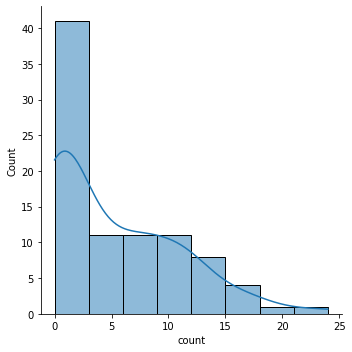

In [6]:
sns.displot(
    df['count'],
    kde=True,
    bins=8
)
plt.show()

## Scatterplot & Lineplot: Film-Count by Year

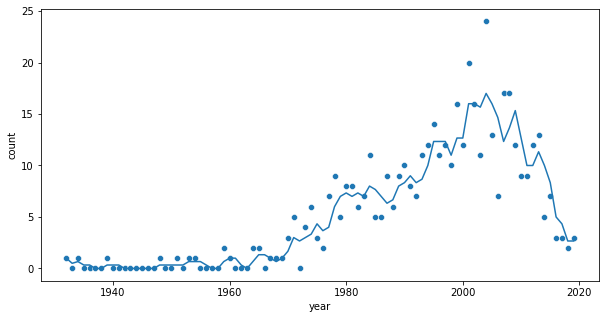

In [7]:
plt.figure( figsize=(10,5))
sns.scatterplot(
    data=df,
    x='year',
    y='count')
sns.lineplot(
    data=df,
    x='year',
    y='running average')
plt.show()

## RegPlot and JointPlot: Count vs. Running Average

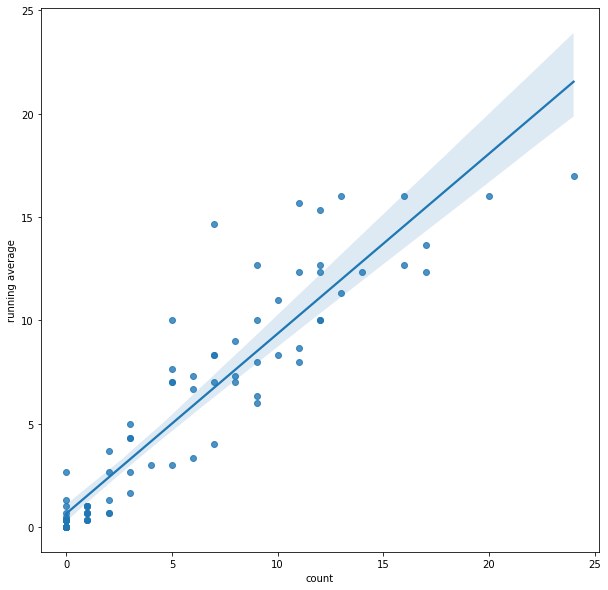

In [8]:
sns.regplot(
    data=df,
    x='count',
    y='running average')
plt.show()

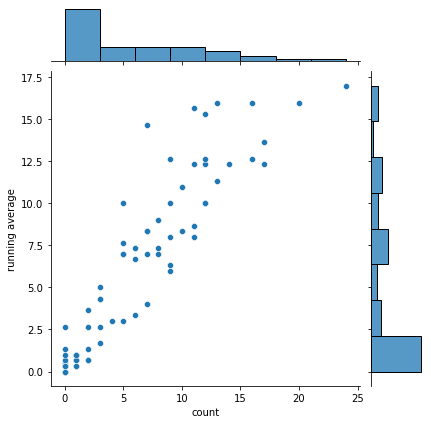

In [9]:
sns.jointplot(
    data=df,
    x='count',
    y='running average')
plt.show()